## Imports

In [1]:
import time
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
from scipy.fft import fft
import scipy.fftpack

In [2]:
fs = 44100  # sampling rate, Hz, must be integer
duration = 3  # in seconds, may be float
f1 = 261.625  # sine frequency, Hz, may be float

In [3]:
def sine_wave(f, fs=44100):
  return (np.sin(2 * np.pi * np.arange(fs * duration) * f / fs)).astype(np.float32)

In [4]:
c_harm = sine_wave(f1) + 0.5*sine_wave(f1*2) + 0.25*sine_wave(f1*3) + 0.125*sine_wave(f1*4)

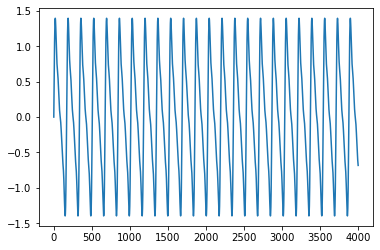

In [14]:
plt.plot(c_harm[:4000])
plt.show()

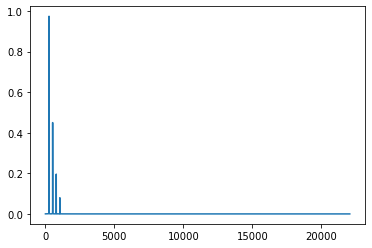

In [13]:
N = len(c_harm)
maxFreqN = N//2
yfft = scipy.fftpack.fft(c_harm)
yf =  2/N*(np.abs(yfft[:N//2]))
xf = np.linspace(0.0, 1.0/(2.0*(1/fs)), N//2)
plt.plot(xf[:maxFreqN], yf[:maxFreqN])
plt.show()

In [11]:
def playAudio(samples, volume=0.5):
  # per @yahweh comment explicitly convert to bytes sequence
  output_bytes = (volume * samples).tobytes()
  p = pyaudio.PyAudio()

  stream = p.open(format=pyaudio.paFloat32,
                  channels=1,
                  rate=fs,
                  output=True)

  # play. May repeat with different volume values (if done interactively)
  start_time = time.time()
  stream.write(output_bytes)
  print("Played sound for {:.2f} seconds".format(time.time() - start_time))

  stream.stop_stream()
  stream.close()
  p.terminate()

In [44]:
playAudio(sine_wave(f1) + 0.5*sine_wave(f1*2) + 0.25*sine_wave(f1*3) + 0.125*sine_wave(f1*4))

Played sound for 3.02 seconds


In [43]:
playAudio(sine_wave(f1) + 0.5*sine_wave(f1*2) + 0.25*sine_wave(f1*3))

Played sound for 3.02 seconds
